# Pymaceuticals Inc.
---

### Analysis

- The average tumor size exhibits a robust correlation with mouse weight (r = 0.951), indicating that, on average, heavier mice tend to have larger tumors. This relationship is visually represented in the scatter plots located at the bottom.

The effectiveness of Capomulin in reducing tumor size over time is evident from the line graph depicting Tumor Volume versus Timpoint.

In comparison, Infubinol and Ceftamin show higher final tumor volumes than Capomulin and Ramicane, as illustrated by the box plots below.
 

In [29]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
from scipy.stats import linregress


In [3]:
# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
combined_df = pd.merge(mouse_metadata, study_results, how = "right", on=["Mouse ID", "Mouse ID"])
# Display the data table for preview
combined_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,b128,Capomulin,Female,9,22,0,45.000000,0
1,f932,Ketapril,Male,15,29,0,45.000000,0
2,g107,Ketapril,Female,2,29,0,45.000000,0
3,a457,Ketapril,Female,11,30,0,45.000000,0
4,c819,Ketapril,Male,21,25,0,45.000000,0
...,...,...,...,...,...,...,...,...
1888,r944,Capomulin,Male,12,25,45,41.581521,2
1889,u364,Capomulin,Male,18,17,45,31.023923,3
1890,p438,Ceftamin,Female,11,26,45,61.433892,1
1891,x773,Placebo,Female,21,30,45,58.634971,4


In [4]:
# Checking the number of mice.
#total_mice = mouse_metadata["Mouse ID"].count()
total_mice = combined_df["Mouse ID"].nunique()
total_mice

249

In [6]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicate_mouse_id = combined_df[combined_df.duplicated()]["Mouse ID"]
duplicate_mouse_id

137    g989
Name: Mouse ID, dtype: object

In [7]:
# Optional: Get all the data for the duplicate mouse ID. 
duplicate_mouse_data = combined_df[combined_df["Mouse ID"].str.contains('g989')]
duplicate_mouse_data

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
107,g989,Propriva,Female,21,26,0,45.000000,0
137,g989,Propriva,Female,21,26,0,45.000000,0
329,g989,Propriva,Female,21,26,5,48.786801,0
360,g989,Propriva,Female,21,26,5,47.570392,0
620,g989,Propriva,Female,21,26,10,51.745156,0
681,g989,Propriva,Female,21,26,10,49.880528,0
815,g989,Propriva,Female,21,26,15,51.325852,1
869,g989,Propriva,Female,21,26,15,53.442020,0
950,g989,Propriva,Female,21,26,20,55.326122,1
1111,g989,Propriva,Female,21,26,20,54.657650,1


In [9]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_df = combined_df[~(combined_df.duplicated(subset="Mouse ID", keep=False) & combined_df["Mouse ID"].eq("g989"))].copy() #note .copy() is to remove errors 
clean_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,b128,Capomulin,Female,9,22,0,45.0,0
1,f932,Ketapril,Male,15,29,0,45.0,0
2,g107,Ketapril,Female,2,29,0,45.0,0
3,a457,Ketapril,Female,11,30,0,45.0,0
4,c819,Ketapril,Male,21,25,0,45.0,0


In [10]:
# Checking the number of mice in the clean DataFrame.
total_mice_clean = clean_df["Mouse ID"].nunique()
total_mice_clean

248

## Summary Statistics

In [12]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary DataFrame.
mean_tumor_volume = clean_df.groupby(["Drug Regimen"])["Tumor Volume (mm3)"].mean()
mean_tumor_volume

median_tumor_volume = clean_df.groupby(["Drug Regimen"])["Tumor Volume (mm3)"].median()
median_tumor_volume

tumor_volume_variance = clean_df.groupby(["Drug Regimen"])["Tumor Volume (mm3)"].var()
tumor_volume_variance

tumor_volume_stddev = clean_df.groupby(["Drug Regimen"])["Tumor Volume (mm3)"].std()
tumor_volume_stddev

tumor_volume_sem = clean_df.groupby(["Drug Regimen"])["Tumor Volume (mm3)"].sem()
tumor_volume_sem

clean_df

###### NOTE: Calculations shown above^^ ####

# Assemble the resulting (groupby) series into a single summary DataFrame.
summary_df = pd.DataFrame({
    "Mean Tumor Volume":mean_tumor_volume,
    "Median Tumor Volume":median_tumor_volume,
    "Tumor Volume Variance":tumor_volume_variance,
    "Tumor Volume Std. Dev.":tumor_volume_stddev,
    "Tumor Volume Std. Err.":tumor_volume_sem
})
summary_df

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [14]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)
tumor_volume_sem = clean_df.groupby(["Drug Regimen"])["Tumor Volume (mm3)"].sem()
tumor_volume_sem

clean_df

###### NOTE: Calculations shown above^^ ####

# Assemble the resulting (groupby) series into a single summary DataFrame.
summary_df = pd.DataFrame({
    "Mean Tumor Volume":mean_tumor_volume,
    "Median Tumor Volume":median_tumor_volume,
    "Tumor Volume Variance":tumor_volume_variance,
    "Tumor Volume Std. Dev.":tumor_volume_stddev,
    "Tumor Volume Std. Err.":tumor_volume_sem
})
summary_df
# Using the aggregation method, produce the same summary statistics in a single line.
summary_stats_agg = clean_df.groupby(["Drug Regimen"])["Tumor Volume (mm3)"].agg(['mean','median','var','std','sem'])
summary_stats_agg

,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

Text(0, 0.5, 'Number of Mice Tested')

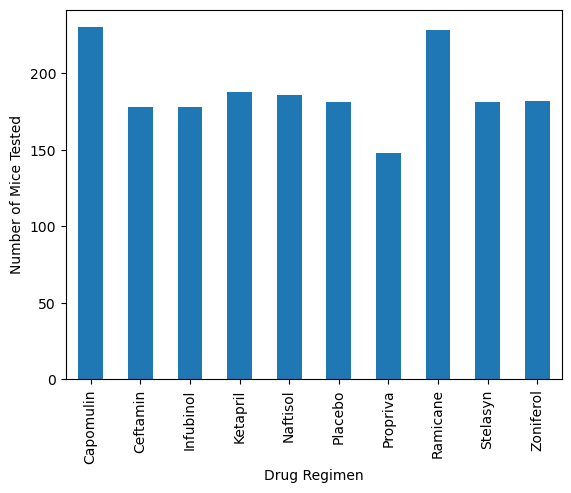

In [15]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using Pandas.
mice_tested_per_drug = clean_df.groupby(["Drug Regimen"]).count()["Mouse ID"]
mice_tested_per_drug

drug_regimens = clean_df["Drug Regimen"].unique()
drug_regimens.sort() #needed in order to get the correct axis entries for pyplot
drug_regimens

panda_plot = mice_tested_per_drug.plot.bar()
panda_plot.set_xlabel("Drug Regimen")
panda_plot.set_ylabel("Number of Mice Tested")

Text(0, 0.5, 'Number of Mice Tested')

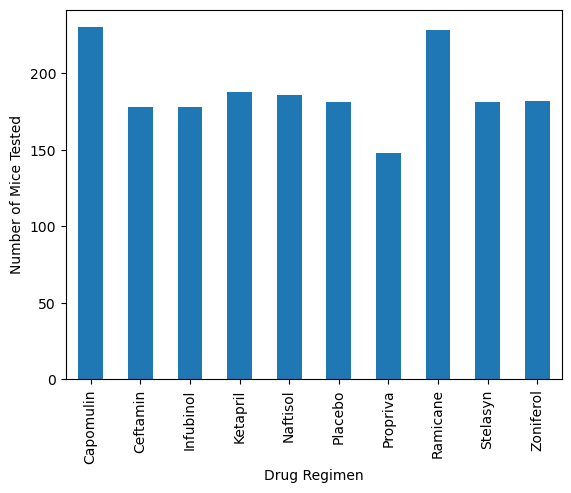

In [16]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
panda_plot = mice_tested_per_drug.plot.bar()
panda_plot.set_xlabel("Drug Regimen")
panda_plot.set_ylabel("Number of Mice Tested")

In [17]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
sex_df = clean_df["Sex"]
plot_data = sex_df.value_counts("Male")
plot_data

Sex
Male      0.509574
Female    0.490426
Name: proportion, dtype: float64

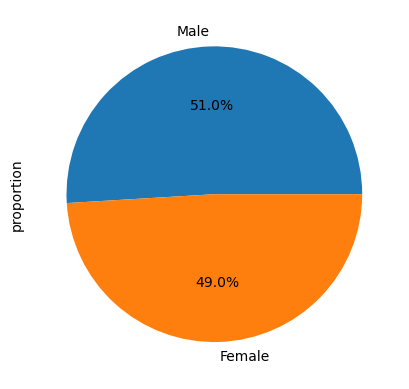

In [18]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
panda_pie_plot = plot_data.plot.pie(autopct='%1.1f%%')

## Quartiles, Outliers and Boxplots

In [20]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
final_timepoints_per_MouseID = clean_df[(clean_df["Timepoint"] == 45)]
final_timepoints_per_MouseID

# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
clean_final = pd.merge(clean_df, final_timepoints_per_MouseID)
clean_final.set_index('Mouse ID')


,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
Mouse ID,,,,,,,
n364,Ramicane,Male,4,17,45,31.095335,1
b128,Capomulin,Female,9,22,45,38.982878,2
l661,Ceftamin,Male,18,26,45,59.851956,3
y865,Ceftamin,Male,23,26,45,64.729837,3
y769,Ceftamin,Female,6,27,45,68.594745,4
...,...,...,...,...,...,...,...
r944,Capomulin,Male,12,25,45,41.581521,2
u364,Capomulin,Male,18,17,45,31.023923,3
p438,Ceftamin,Female,11,26,45,61.433892,1


In [22]:
capomulin_final = clean_final[clean_final["Drug Regimen"] == "Capomulin"]
capomulin_final


capomulin_final = clean_final[clean_final["Drug Regimen"] == "Capomulin"]
capomulin_volume = capomulin_final["Tumor Volume (mm3)"]
capomulin_volume

#capomulin final tumor volumes
capomulin_final = clean_final[clean_final["Drug Regimen"] == "Capomulin"].set_index('Mouse ID')
capomulin_volume = capomulin_final["Tumor Volume (mm3)"]
capomulin_volume

ramicane_final = clean_final[clean_final["Drug Regimen"] == "Ramicane"]
ramicane_volume = ramicane_final["Tumor Volume (mm3)"]
ramicane_volume

#ramicane final tumor volumes
ramicane_final = clean_final[clean_final["Drug Regimen"] == "Ramicane"].set_index('Mouse ID')
ramicane_volume = ramicane_final["Tumor Volume (mm3)"]
ramicane_volume


infubinol_final = clean_final[clean_final["Drug Regimen"] == "Infubinol"]
infubinol_volume = infubinol_final["Tumor Volume (mm3)"]
infubinol_volume


#infubinol final tumor volumes
infubinol_final = clean_final[clean_final["Drug Regimen"] == "Infubinol"].set_index('Mouse ID')
infubinol_volume = infubinol_final["Tumor Volume (mm3)"]
infubinol_volume

#ceftamin final tumor volumes
ceftamin_final = clean_final[clean_final["Drug Regimen"] == "Ceftamin"]
ceftamin_volume = ceftamin_final["Tumor Volume (mm3)"]
ceftamin_volume

#ceftamin final tumor volumes
ceftamin_final = clean_final[clean_final["Drug Regimen"] == "Ceftamin"].set_index('Mouse ID')
ceftamin_volume = ceftamin_final["Tumor Volume (mm3)"]
ceftamin_volume

Mouse ID
l661    59.851956
y865    64.729837
y769    68.594745
j296    61.849023
w151    67.527482
l471    67.748662
x581    64.634949
a275    62.999356
k210    68.923185
x822    61.386660
l733    64.299830
o287    59.741901
p438    61.433892
Name: Tumor Volume (mm3), dtype: float64

In [23]:
# Put treatments into a list for for loop (and later for plot labels)
treatments = ["Capomulin","Ramicane","Infubinol","Ceftamin"]
treatments

# Create empty list to fill with tumor vol data (for plotting)
tumor_vol_data = []

# Calculate the IQR and quantitatively determine if there are any potential outliers. 

    # Locate the rows which contain mice on each drug and get the tumor volumes
    # add subset 
    # Determine outliers using upper and lower bounds
    
capomulin_quartiles = capomulin_volume.quantile([.25,.5,.75])
capomulin_lowerq = capomulin_quartiles[.25]
capomulin_upperq = capomulin_quartiles[.75]
capomulin_iqr = capomulin_upperq - capomulin_lowerq
capomulin_lower_bound = capomulin_lowerq - (1.5*capomulin_iqr)
capomulin_upper_bound = capomulin_upperq + (1.5*capomulin_iqr)

ramicane_quartiles = ramicane_volume.quantile([.25,.5,.75])
ramicane_lowerq = ramicane_quartiles[.25]
ramicane_upperq = ramicane_quartiles[.75]
ramicane_iqr = ramicane_upperq - ramicane_lowerq
ramicane_lower_bound = ramicane_lowerq - (1.5*ramicane_iqr)
ramicane_upper_bound = ramicane_upperq + (1.5*ramicane_iqr)

infubinol_quartiles = infubinol_volume.quantile([.25,.5,.75])
infubinol_lowerq = infubinol_quartiles[.25]
infubinol_upperq = infubinol_quartiles[.75]
infubinol_iqr = infubinol_upperq - infubinol_lowerq
infubinol_lower_bound = infubinol_lowerq - (1.5*infubinol_iqr)
infubinol_upper_bound = infubinol_upperq + (1.5*infubinol_iqr)

ceftamin_quartiles = ceftamin_volume.quantile([.25,.5,.75])
ceftamin_lowerq = ceftamin_quartiles[.25]
ceftamin_upperq = ceftamin_quartiles[.75]
ceftamin_iqr = ceftamin_upperq - ceftamin_lowerq
ceftamin_lower_bound = ceftamin_lowerq - (1.5*ceftamin_iqr)
ceftamin_upper_bound = ceftamin_upperq + (1.5*ceftamin_iqr)

print(f"Capomulin IQR: {capomulin_iqr}")
print(f"Capomulin values below: {capomulin_lower_bound} could be outliers")
print(f"Capomulin values above: {capomulin_upper_bound} could be outliers")
print(f"Ramicane IQR: {ramicane_iqr}")
print(f"Ramicane values below: {ramicane_lower_bound} could be outliers")
print(f"Ramicane values above: {ramicane_upper_bound} could be outliers")
print(f"Infubinol IQR: {infubinol_iqr}")
print(f"Infubinol values below: {infubinol_lower_bound} could be outliers")
print(f"Infubinol values above: {infubinol_upper_bound} could be outliers")
print(f"Ceftamin IQR: {ceftamin_iqr}")
print(f"Ceftamin values below: {ceftamin_lower_bound} could be outliers")
print(f"Ceftamin values above: {ceftamin_upper_bound} could be outliers")

Capomulin IQR: 7.781863460000004
Capomulin values below: 20.70456164999999 could be outliers
Capomulin values above: 51.83201549 could be outliers
Ramicane IQR: 7.527130082500001
Ramicane values below: 19.69048010125 could be outliers
Ramicane values above: 49.79900043125001 could be outliers
Infubinol IQR: 4.9311172099999965
Infubinol values below: 55.35777559500001 could be outliers
Infubinol values above: 75.08224443499999 could be outliers
Ceftamin IQR: 6.093590140000003
Ceftamin values below: 52.29350701999999 could be outliers
Ceftamin values above: 76.66786758 could be outliers


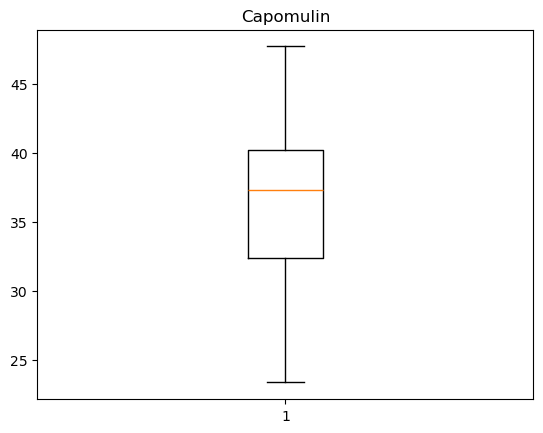

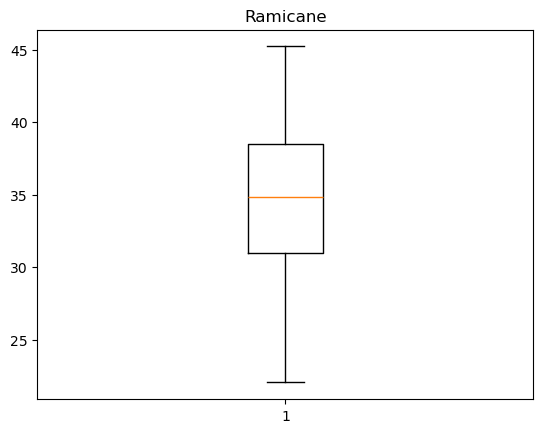

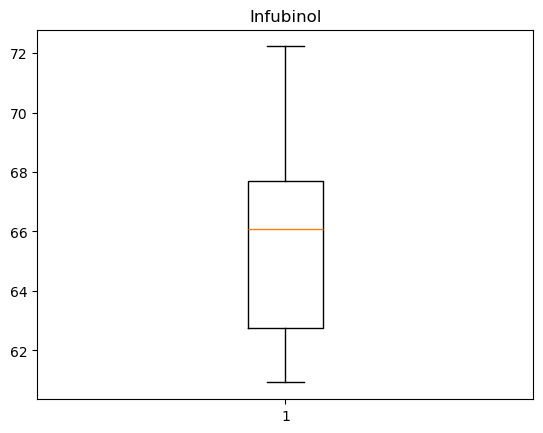

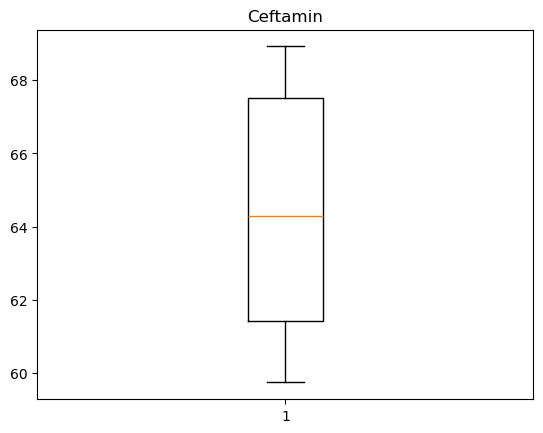

[Text(1, 0, 'Capomuln'),
 Text(2, 0, 'Ramicane'),
 Text(3, 0, 'Infubinol'),
 Text(4, 0, 'Ceftamin')]

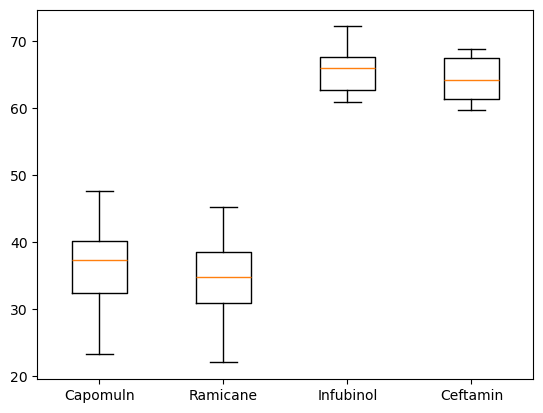

In [24]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.

#create lists of each drug's final tumor volume
capomulin_box = list(capomulin_volume)
ramicane_box = list(ramicane_volume)
infubinol_box = list(infubinol_volume)
ceftamin_box = list(ceftamin_volume)

#Capomulin Boxplot
fig1, ax1 = plt.subplots()
ax1.set_title("Capomulin")
ax1.set_label('Final Tumor Volune (mm3)')
ax1.boxplot(capomulin_box)
plt.show()

#Ramicane Boxplot
fig2, ax2 = plt.subplots()
ax2.set_title("Ramicane")
ax2.set_label('Final Tumor Volune (mm3)')
ax2.boxplot(ramicane_box)
plt.show()

#Infubinol Boxplot
fig3, ax3 = plt.subplots()
ax3.set_title("Infubinol")
ax3.set_label('Final Tumor Volune (mm3)')
ax3.boxplot(infubinol_box)
plt.show()


#Ceftamin Boxplot
fig4, ax4 = plt.subplots()
ax4.set_title("Ceftamin")
ax4.set_label('Final Tumor Volune (mm3)')
ax4.boxplot(ceftamin_box)
plt.show()


# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.
#Combined Boxplot
box_dict = {'Capomuln' : capomulin_box,'Ramicane': ramicane_box, 'Infubinol': infubinol_box ,'Ceftamin':ceftamin_box}

fig, ax = plt.subplots()
ax.boxplot(box_dict.values())
ax.set_xticklabels(box_dict.keys())


## Line and Scatter Plots

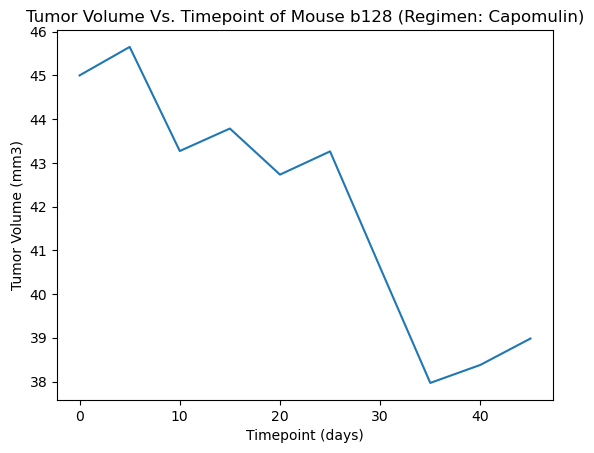

In [25]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin

#capomulin specific df
capomulin_df = clean_df[clean_df['Drug Regimen'] == 'Capomulin']
capomulin_df


#choose a mouse and display it's data
mouse_b128_tumor_over_time = capomulin_df[capomulin_df['Mouse ID']  == 'b128']
mouse_b128_tumor_over_time

#define x axis for line plot
x_axis_data = list(mouse_b128_tumor_over_time['Timepoint'])
x_axis_data

#define y axis for line plot
y_axis_data = list(mouse_b128_tumor_over_time['Tumor Volume (mm3)'])
y_axis_data

# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
plt.plot(x_axis_data,y_axis_data)
plt.xlabel('Timepoint (days)')
plt.ylabel('Tumor Volume (mm3)')
plt.title('Tumor Volume Vs. Timepoint of Mouse b128 (Regimen: Capomulin)')
plt.show()

Text(0, 0.5, 'Average Tumor Volume (mm3)')

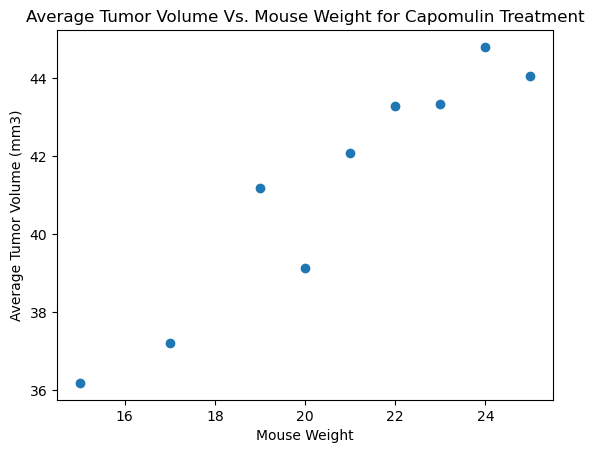

In [27]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen


average_tumor_vol_capomulin = capomulin_df.groupby(['Weight (g)'])['Tumor Volume (mm3)'].mean()
average_tumor_vol_capomulin


x_axis_vals = average_tumor_vol_capomulin.keys()
x_axis_vals


y_axis_vals = list(average_tumor_vol_capomulin)
y_axis_vals


plt.scatter(x_axis_vals, y_axis_vals, marker="o")
plt.title("Average Tumor Volume Vs. Mouse Weight for Capomulin Treatment")
plt.xlabel("Mouse Weight")
plt.ylabel("Average Tumor Volume (mm3)")


## Correlation and Regression

The r-value is:0.9505243961855268


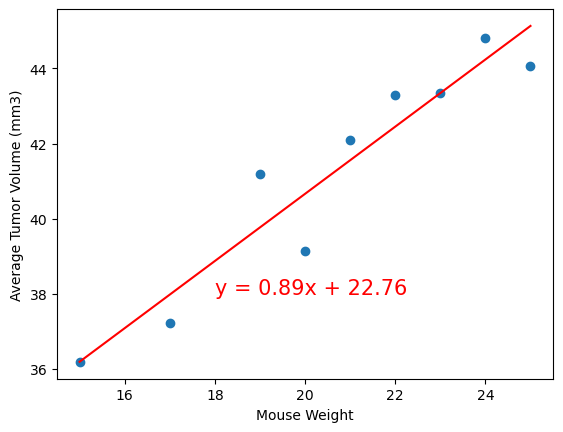

In [30]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_axis_vals, y_axis_vals)
regress_values = x_axis_vals * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_axis_vals,y_axis_vals)
plt.plot(x_axis_vals,regress_values,"r-")
plt.annotate(line_eq,(18,38),fontsize=15,color="red")
plt.xlabel('Mouse Weight')
plt.ylabel('Average Tumor Volume (mm3)')
print(f"The r-value is:{rvalue}")
plt.show()